# Machine Learning using scikit-learn (KNN)
### Learning to predict Airbnb rental prices
***
_Note that this tutorial is based on DataQuest's Machine Learning tutorial. Minor tweaks were made to fix deprecated code and to visualize data, learning, and trends._ https://www.dataquest.io/blog/machine-learning-tutorial/
***
#### Introduction to Machine Learning
Machine learning is a study of algorithms that computes a given task without the specific instructions or code to complete those tasks. These algorithms, or systems, are known as models that learn by being fed data (in our case, the Inside Airbnb dataset) and eventually give a predition that is accurate given the dataset is correct. In our case, we are trying to rent out your space in Santa Cruz, you don't know what price you should ask for. Depending on your features that the house you are renting out, the price will vary.

First, we will import pandas and read the csv file.

In [30]:
# Importing pandas, read csv file, prints rows and cols
import pandas as pd

dc_listings = pd.read_csv('santacruz.csv')
print(dc_listings.shape)
dc_listings.head(3) # Only first 3 rows printed

(1650, 106)


id                         listing_url       scrape_id last_scraped  \
0  11879  https://www.airbnb.com/rooms/11879  20190430041753   2019-04-30   
1  24548  https://www.airbnb.com/rooms/24548  20190430041753   2019-04-30   
2  25107  https://www.airbnb.com/rooms/25107  20190430041753   2019-04-30   

                                         name  \
0         Sunny room close to beach and parks   
1  Room with Private Entrance. No extra fees.   
2                       Craftsman in the Cruz   

                                             summary  \
0                                                NaN   
1  Great Location near Harbor and Beach. Bedroom ...   
2  Old suburban delight! Our home was built in 19...   

                                               space  \
0  Room in solar/powered home with remodeled kitc...   
1  Room is set up much like a hotel room with eve...   
2  Old suburban delight! Our home was built in 19...   

                                         description experiences_offered  \
0  Room in solar/powered home with remodeled kitc...                none   
1  Great Location near Harbor and Beach. Bedroom ...                none   
2  Old suburban delight! Our home was built in 19...                none   

                               neighborhood_overview        ...          \
0                                                NaN        ...           
1  Great location close to Santa Cruz Harbor and ...        ...           
2  We are located in "Midtown", which is just eas...        ...           

  instant_bookable is_business_travel_ready cancellation_policy  \
0                f                        f            moderate   
1                f                        f            flexible   
2                f                        f            moderate   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             f                                f   
2                             f                                f   

   calculated_host_listings_count  \
0                               3   
1                               1   
2                               1   

   calculated_host_listings_count_entire_homes  \
0                                            2   
1                                            0   
2                                            1   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            1   
2                                            0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                            0               0.30  
1                                            0               3.52  
2                                            0               0.55  

[3 rows x 106 columns]

#### Types of Models
We have a slew of different models we can use to predict prices, such as Bayesian Networks, Decision Trees, and Logistic Regression. In this case, we are using K-nearest neighbors.

#### A Short Explanation of how K-Nearest Neighbors works
With KNN, we want to look at rentals that look similar to our house and take the average of the listings we found. To start, select a number, k, indicating the amount of entries you want to compare to.

Using a similarity metric, we want to calculate similarities between each listing.

Rank the listings with the metric we calculated and select the first few entries.

Finally, we calculate the mean price for the k similar listings, and use that as our list price. 

We will start with a k of 5.

#### Euclidean Distance
The way we calculate similarity is Euclidean distance, basically how far away the observed is from our listing. The following is the equation:
\begin{align}
d=\sqrt{(q_1-p_1)^2+(q_2-p_2)^2+(q_3-p_3)^2+...+(q_n-p_n)^2} \\
\end{align}
Where n is the last feature we want to add to our similarity metric.

#### Super Simplified KNN Model
To simplified the process, let's look at just one column.

In [31]:
# Importing numpy for getting the absolute value
import numpy as np

# Our accommodation value
our_acc_value = 3
first_living_space_value = dc_listings.loc[0,'accommodates']
first_distance = np.abs(first_living_space_value - our_acc_value)
print(first_distance)

1


In [32]:
# A list of Super Simplified KNN Model
dc_listings['distance'] = np.abs(dc_listings.accommodates - our_acc_value)
dc_listings.distance.value_counts().sort_index()

0     111
1     790
2     118
3     263
4      48
5     201
6      19
7      55
8       6
9      20
10      1
11      6
12      4
13      8
Name: distance, dtype: int64

In [33]:
# Randomize to order of this list to remove bias and sort values
dc_listings = dc_listings.sample(frac=1,random_state=0)
dc_listings = dc_listings.sort_values('distance')
dc_listings.price.head()

223      $95.00
1036     $86.00
1324    $125.00
1287    $120.00
468     $110.00
Name: price, dtype: object

In [34]:
# Make 'price' series into ints and then take the mean of 5 random samples
dc_listings['price'] = dc_listings.price.str.replace("\$|,",'').astype(float)
mean_price = dc_listings.price.iloc[:5].mean()
mean_price

107.2

#### Checking our Model's Accuracy
We need to test value against the sample values so we are going to seperate our dataset. 75% of the data will belong to the training data, the data that will teach the computer what features do to affect our price. And rest of the 25% of the data will belong to the test data, data that will determine the accuracy of our model.

In our case, we have 1650, so 1237 of those listings will be used for the training data, and the rest will be for test data.

In [35]:
dc_listings.drop('distance',axis=1)
train_df = dc_listings.copy().iloc[:1237]
test_df = dc_listings.copy().iloc[1237:]

In [36]:
# Here is our Super Simple KNN Model, but in the form of a function to make it easier to perform
# KNN on our dataset.
def predict_price(new_listing_value,feature_column):
    temp_df = train_df
    temp_df['distance'] = np.abs(dc_listings[feature_column] - new_listing_value)
    temp_df = temp_df.sort_values('distance')
    knn_5 = temp_df.price.iloc[:5]
    predicted_price = knn_5.mean()
    return(predicted_price)

In [37]:
# Use apply to predict the price using the column we want to use in the similarity metric
test_df['predicted_price'] = test_df.accommodates.apply(predict_price,feature_column='accommodates')

#### Root Means Squared Error
When we need to make predictions, a lot of the times, there can be outliers. These outliers can affect our mean drasticaally, especially if the have a small k. So we need to make sure outliers don't skew our mean too far from our accurate prediciton. If we take the root means squared error, we can mean the squred error values. Here is the formula:
\begin{align}
RSME=\sqrt{\frac{(actual_1-predicted_1)^2+(actual_2-predicted_2)^2+...+(actual_n-predicted_n)^2}{n}}
\end{align}
n is the number of rows the test set has

In [38]:
# Calculate the Root Mean Squared Error
test_df['squared_error'] = (test_df['predicted_price'] - test_df['price'])**(2)
mse = test_df['squared_error'].mean()
test_df['squared_error']
rmse = mse ** (1/2)
rmse

328.7361372619211

In [39]:
for feature in ['accommodates','bedrooms','bathrooms','number_of_reviews']:
    test_df['predicted_price'] = test_df.accommodates.apply(predict_price,feature_column=feature)
    test_df['squared_error'] = (test_df['predicted_price'] - test_df['price'])**(2)
    mse = test_df['squared_error'].mean()
    rmse = mse ** (1/2)
    print("RMSE for the {} column: {}".format(feature,rmse))

RMSE for the accommodates column: 328.7361372619211
RMSE for the bedrooms column: 287.2606517327049
RMSE for the bathrooms column: 293.969789754212
RMSE for the number_of_reviews column: 376.6874024019508


#### Normalize the Data!!!
Some important notes before continuing to a fleshed out version of KNN, as mentioned in the DataQuest tutorial.
 * All columns have been converted to numeric values, since we can’t calculate the Euclidean distance of a value with non-numeric characters.
 * Non numeric columns have been removed for simplicity.
 * Any listings with missing values have been removed.
 * We have normalized the columns which will give us more accurate results.

Normalizing the data gives us more accurate results because data can be nonlinear. Finding the z-score can help us we reaching a linear relationship for the data we are working with.

In [40]:
# We just read the csv file outright and normalize it using pandas
normalized_listings = pd.read_csv('santacruz.csv')
print("Before Normalizing: ",normalized_listings.shape)

#We convert all of the strings in each of the features we want to test into int so that our model can read the data
accommodates = pd.to_numeric(normalized_listings['accommodates'], errors='coerce')
bedrooms = pd.to_numeric(normalized_listings['bedrooms'], errors='coerce')
bathrooms = pd.to_numeric(normalized_listings['bathrooms'], errors='coerce')
beds = pd.to_numeric(normalized_listings['beds'], errors='coerce')
price = normalized_listings['price'].str.slice(start=1)
price = pd.to_numeric(price, errors='coerce')
minimum_nights = pd.to_numeric(normalized_listings['minimum_nights'], errors='coerce')
maximum_nights = pd.to_numeric(normalized_listings['maximum_nights'], errors='coerce')
number_of_reviews = pd.to_numeric(normalized_listings['number_of_reviews'], errors='coerce')

# Getting the new data sorted into a new dataframe
cols = [accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews]
names = ['accommodates','bedrooms','bathrooms','beds','price','minimum_nights','maximum_nights','number_of_reviews']

# We create a new dataframe and remove any rows that contain NAN values
normalized_listings = pd.concat(cols,names=names, axis=1)
normalized_listings = normalized_listings.dropna(axis=0)

# A function to normalize (standardize) the data efficiently
def normalize(s):
    temp_s = s
    mean = temp_s.mean()
    sd = temp_s.std()
    temp_s = temp_s.add(mean*-1)
    temp_s = temp_s.multiply(1/sd)
    return temp_s

# We normalize the data except the price
normalized_listings = normalized_listings.apply(normalize,axis=1)
normalized_listings['price'] = price

print("After Normalizing: ",normalized_listings.shape)
normalized_listings.head()

# We lost 27 rows of data

Before Normalizing:  (1650, 106)
After Normalizing:  (1633, 8)


accommodates  bedrooms  bathrooms      beds  price  minimum_nights  \
0     -0.635801 -0.680814  -0.680814 -0.680814   60.0       -0.635801   
1     -0.431915 -0.439314  -0.439314 -0.439314   85.0       -0.439314   
2     -0.441000 -0.472928  -0.504855 -0.472928  180.0       -0.472928   
3     -0.665088 -0.678457  -0.678457 -0.678457  190.0       -0.678457   
4     -0.466602 -0.474562  -0.474562 -0.466602   85.0       -0.474562   

   maximum_nights  number_of_reviews  
0        0.624548           0.714573  
1       -0.409718           2.416691  
2       -0.409073           0.421045  
3        0.511349           1.019356  
4       -0.243748           2.406634

In [41]:
# We use the 75% and 25% rule to create the test data and the training data
normalized_listings = normalized_listings.sample(frac=1,random_state=0)
norm_train_df = normalized_listings.copy().iloc[0:1225]
norm_test_df = normalized_listings.copy().iloc[1225:]

#### Euclidean Distances for multiple columns
To calculate Euclidean Distances for multiple features or columns, we can just use the equation we mentioned earlier, but because we have access to functions in scipy, we are going to use the scipy distance class containing the cdist function, which calculates the euclidean distance of multiple features. (cdist can calculate a lot of different distance equations, but euclidean distance is the default calculation unless stated otherwise).

In [42]:
# Importing distance from the scipy library
from scipy.spatial import distance

def predict_price_multivariate(new_listing_value,feature_columns):
    temp_df = norm_train_df
    temp_df['distance'] = distance.cdist(temp_df[feature_columns],[new_listing_value[feature_columns]])
    temp_df = temp_df.sort_values('distance')
    knn_5 = temp_df.price.iloc[:5]
    predicted_price = knn_5.mean()
    return(predicted_price)

cols = ['accommodates', 'bathrooms']
norm_test_df['predicted_price'] = norm_test_df.apply(predict_price_multivariate,feature_columns=cols,axis=1)
norm_test_df['squared_error'] = (norm_test_df['predicted_price'] - norm_test_df['price'])**(2)
mse = norm_test_df['squared_error'].mean()
rmse = mse ** (1/2)
print(rmse)

153.27653626249344


#### Let's Finally Try Using Scikit-learn
Instead of using our homemade version of KNN, let's try using the KNN model written in the scikit-learn library. 

In [43]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

#### Default values for KNN on sklearn
 * n_neighbors: the number of neighbors, is set to 5
 * algorithm: for computing nearest neighbors, is set to auto
   * we are looking for a brute force tendency for this KNN algorithm
 * p: set to 2, corresponding to Euclidean distance


In [44]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(algorithm='brute')

In [45]:
# Fitting is for learning, Predicting is for predicting.
knn.fit(norm_train_df[cols], norm_train_df['price'])
two_features_predictions = knn.predict(norm_test_df[cols])

In [46]:
# We just import the function to calulate the mean_squared_error
from sklearn.metrics import mean_squared_error
two_features_mse = mean_squared_error(norm_test_df['price'], two_features_predictions)

# Take the square root for the rsme
two_features_rmse = two_features_mse ** (1/2)
print(two_features_rmse)

153.2765362624934


In [47]:
knn = KNeighborsRegressor(algorithm='brute')
cols = ['accommodates','bedrooms','bathrooms','beds']
knn.fit(norm_train_df[cols], norm_train_df['price'])
four_features_predictions = knn.predict(norm_test_df[cols])
four_features_mse = mean_squared_error(norm_test_df['price'], four_features_predictions)
four_features_rmse = four_features_mse ** (1/2)
four_features_rmse

132.26871267590525

In [48]:
knn = KNeighborsRegressor(algorithm='brute')
cols = ['accommodates','bedrooms','bathrooms','beds','minimum_nights','maximum_nights','number_of_reviews']
knn.fit(norm_train_df[cols], norm_train_df['price'])
seven_features_predictions = knn.predict(norm_test_df[cols])
seven_features_mse = mean_squared_error(norm_test_df['price'], seven_features_predictions)
seven_features_rmse = seven_features_mse ** (1/2)
seven_features_rmse

122.97988557037269

#### Let's see how k can affect our prediction
Using Matplotlib, we are going to chart our predictions to see the trend of k. We won't check even numbered k values to prevent ties.

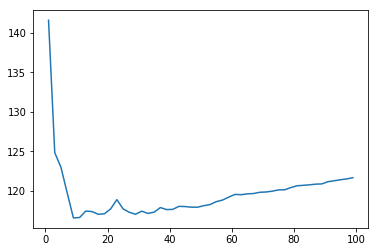

In [53]:
import matplotlib.pyplot as plt

knn = KNeighborsRegressor(algorithm='brute')
cols = ['accommodates','bedrooms','bathrooms','beds','minimum_nights','maximum_nights','number_of_reviews']

x = []
predictions = []

for k in range(100):
    if k % 2 != 0:
        knn = KNeighborsRegressor(algorithm='brute', n_neighbors=k)
        knn.fit(norm_train_df[cols], norm_train_df['price'])
        predict = knn.predict(norm_test_df[cols])
        mse = mean_squared_error(norm_test_df['price'], predict)
        rmse = mse ** (1/2)
        predictions.append(rmse)
        x.append(k)

plt.plot(x,predictions)